<a href="https://colab.research.google.com/github/vishesh711/Zillow-Home-Value-Prediction/blob/main/Zillow_Home_Value_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook for Zillow Home Value prediction I have performed LinearRegression and XGBoost,LightGBM on the properties dataset and train dataset. This dataset consists of some important features which are used for predicting future logerror.

#Linear Regression on properties dataset of Zillow

Here we have used some of the python libraries to predict future trends in the home value prediction. Some of those libraries include numpy, pandas, seaborn, matplotlib, keras, xgboost, lightgbm, sklearn

##Linear Regression
Linear regression is a common Statistical Data Analysis technique
It is used to determine the extent to which there is a linear relationship between a dependent variable and one or more independent variables

##Linear Regression is of 2 types :
Simple linear regression
Multiple linear regression
Simple Linear Regression
In Simple linear regression a single independent variable is used to predict the value of a dependent variable

##Multiple Linear Regression
In Multiple linear regression two or more independent variables are used to predict the value of a dependent variable

##The difference between the two is the number of independent variables. In both cases there is only a single dependent variable
##Correlation and Regression
Simple linear regression is similar to correlation in that the purpose is to measure to what extent there is a linear relationship between two variables. The major difference between the two is that correlation makes no distinction between independent and dependent variables while linear regression does. In particular, the purpose of linear regression is to "predict" the value of the dependent variable based upon the values of one or more independent variables

##Data Preprocessing and Exploratory Data Analysis(EDA)
###First we have imported various libraries so that we can use it for preprocessing the data


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Here we have used Zillow Home Value Prediction properties2017 dataset. In this dataset we have various features like the bedroom count, bathroom count, tax amount,etc which can an important part of our analysis

In [4]:
project = pd.read_csv("properties_2017.csv",low_memory = False)

Displaying the null values in the dataset. These null values need to filled with some appropriate value or should be dropped if they are irrelevant. This is an important step as a part of carrying out futher analysis and make the data completely ready for analysis.

In [5]:
project.isnull().sum()

parcelid                           0
airconditioningtypeid           3186
architecturalstyletypeid        4787
basementsqft                    4779
bathroomcnt                        0
bedroomcnt                         0
buildingclasstypeid             4724
buildingqualitytypeid           1265
calculatedbathnbr                362
decktypeid                      4711
finishedfloor1squarefeet        3916
calculatedfinishedsquarefeet      77
finishedsquarefeet12             400
finishedsquarefeet13            4735
finishedsquarefeet15            4517
finishedsquarefeet50            3916
finishedsquarefeet6             4786
fips                               1
fireplacecnt                    4136
fullbathcnt                      363
garagecarcnt                    3892
garagetotalsqft                 3892
hashottuborspa                  4787
heatingorsystemtypeid           1465
latitude                           1
longitude                          1
lotsizesquarefeet                322
p

Step Below drops the columns with maximum null values from the dataset, as these values are not important(since it has many unwanted values) and will impact the overall prediction of future house prices.


In [6]:
to_drop = ['taxdelinquencyyear',
           'taxdelinquencyflag',
           'fireplaceflag',
           'numberofstories',
           'yardbuildingsqft26',
           'yardbuildingsqft17',
           'typeconstructiontypeid',
           'threequarterbathnbr',
          'storytypeid',
          'regionidneighborhood',
          'pooltypeid7',
           'pooltypeid2',
           'pooltypeid10',
           'poolsizesum',
           'poolcnt',
           'hashottuborspa','garagetotalsqft',
           'garagecarcnt',
           'fireplacecnt',
           'finishedsquarefeet6',
           'finishedsquarefeet50',
           'finishedsquarefeet15',
           'finishedsquarefeet13',
           'finishedfloor1squarefeet',
           'decktypeid',
           'buildingqualitytypeid',
           'basementsqft',
           'architecturalstyletypeid',
           'airconditioningtypeid'
          ]

project.drop(to_drop, inplace = True, axis = 1)
project.head()

,parcelid,bathroomcnt,bedroomcnt,buildingclasstypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,10754147,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,...,96337.0,0.0,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN
1,10759547,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,...,96337.0,0.0,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN
2,10843547,0.0,0.0,5.0,NaN,73026.0,NaN,6037.0,NaN,NaN,...,96095.0,0.0,2.0,1959.0,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN
3,10859147,0.0,0.0,3.0,NaN,5068.0,NaN,6037.0,NaN,NaN,...,96424.0,0.0,NaN,1948.0,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN
4,10879947,0.0,0.0,4.0,NaN,1776.0,NaN,6037.0,NaN,NaN,...,96450.0,0.0,1.0,1947.0,196751.0,440101.0,2016.0,243350.0,5725.17,NaN


In [7]:
todrop = ['buildingclasstypeid',
           'heatingorsystemtypeid',
           'propertyzoningdesc',
           'unitcnt'
          ]

project.drop(todrop, inplace = True, axis = 1)

#Displaying the first 5 rows of the updated dataset

project.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,10754147,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,34144442.0,-118654084.0,...,3101.0,96337.0,0.0,NaN,NaN,9.0,2016.0,9.0,NaN,NaN
1,10759547,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,34140430.0,-118625364.0,...,3101.0,96337.0,0.0,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN
2,10843547,0.0,0.0,NaN,73026.0,NaN,6037.0,NaN,33989359.0,-118394633.0,...,3101.0,96095.0,0.0,1959.0,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN
3,10859147,0.0,0.0,NaN,5068.0,NaN,6037.0,NaN,34148863.0,-118437206.0,...,3101.0,96424.0,0.0,1948.0,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN
4,10879947,0.0,0.0,NaN,1776.0,NaN,6037.0,NaN,34194168.0,-118385816.0,...,3101.0,96450.0,0.0,1947.0,196751.0,440101.0,2016.0,243350.0,5725.17,NaN


describe() function gives us the mean and minimum, count,also provides us with the mean and std values and also various set of values ranging from 25%,50% and 75%

In [8]:
project.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
count,4.787000e+03,4787.000000,4787.000000,4425.000000,4710.000000,4387.000000,4786.000000,4424.000000,4.786000e+03,4.786000e+03,...,4786.000000,4741.000000,4786.000000,4700.000000,4.579000e+03,4.631000e+03,4786.000000,4.596000e+03,4723.000000,4.449000e+03
mean,1.377609e+07,2.178086,2.953833,2.356271,1892.490234,1799.723957,6052.193899,2.325949,3.419008e+07,-1.185193e+08,...,2872.991224,96494.097448,1.173840,1964.802979,2.029216e+05,4.789935e+05,2015.995403,2.804701e+05,5779.813610,6.053134e+13
std,1.383052e+07,1.183704,1.345684,1.046834,1730.954342,1001.533249,29.709981,1.046292,1.985316e+05,3.055596e+05,...,445.760284,421.791083,2.572069,21.165043,3.898280e+05,9.467478e+05,0.086616,6.283247e+05,11335.172939,3.015926e+11
min,1.071722e+07,0.000000,0.000000,1.000000,171.000000,171.000000,6037.000000,1.000000,3.352597e+07,-1.194484e+08,...,1286.000000,95984.000000,0.000000,1890.000000,5.950000e+02,9.000000e+00,2014.000000,9.000000e+00,19.070000,6.037101e+13
25%,1.102275e+07,2.000000,2.000000,2.000000,1236.000000,1221.500000,6037.000000,2.000000,3.404278e+07,-1.186130e+08,...,3101.000000,96134.000000,0.000000,1951.000000,8.615800e+04,1.774135e+05,2016.000000,6.458075e+04,2317.055000,6.037137e+13
50%,1.143088e+07,2.000000,3.000000,2.000000,1580.000000,1558.000000,6037.000000,2.000000,3.418845e+07,-1.184510e+08,...,3101.000000,96370.000000,0.000000,1964.000000,1.428820e+05,3.131920e+05,2016.000000,1.579635e+05,3865.920000,6.037603e+13
75%,1.236915e+07,3.000000,4.000000,3.000000,2139.000000,2086.000000,6037.000000,3.000000,3.427140e+07,-1.183614e+08,...,3101.000000,96962.000000,0.000000,1981.000000,2.187210e+05,5.124820e+05,2016.000000,3.144385e+05,6216.295000,6.037920e+13
max,1.681827e+08,12.000000,12.000000,12.000000,73026.000000,18226.000000,6111.000000,12.000000,3.478686e+07,-1.176218e+08,...,3101.000000,97344.000000,12.000000,2016.000000,1.331502e+07,3.016684e+07,2016.000000,2.210127e+07,362406.910000,6.111009e+13


corr() function from pandas library of python or heatmap() function from seaborn library of python help us to identify the columns with maximum correlation and also allows us to decide and think logically which are the features that can be used based on the correlation.

In [11]:
#project.corr()
project_numeric = project.apply(pd.to_numeric, errors='coerce')
project_numeric = project_numeric.dropna(axis=1, how='any')
correlation_matrix = project_numeric.corr()
print(correlation_matrix)


             parcelid  bathroomcnt  bedroomcnt
parcelid     1.000000    -0.081511   -0.101048
bathroomcnt -0.081511     1.000000    0.741824
bedroomcnt  -0.101048     0.741824    1.000000


Below countplot show the range of bathroom and fractional bathroom counts which Zillow offers to its customers according to finished square feet area

From the below countplot we can also conclude that most of the Zillow's customer enjoy have 3 or less bathrooms in there apartments

<ipython-input-10-3cbabf3ea9b2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="bathroomcnt", data=project, palette="Greens_d")


<Axes: xlabel='bathroomcnt', ylabel='count'>

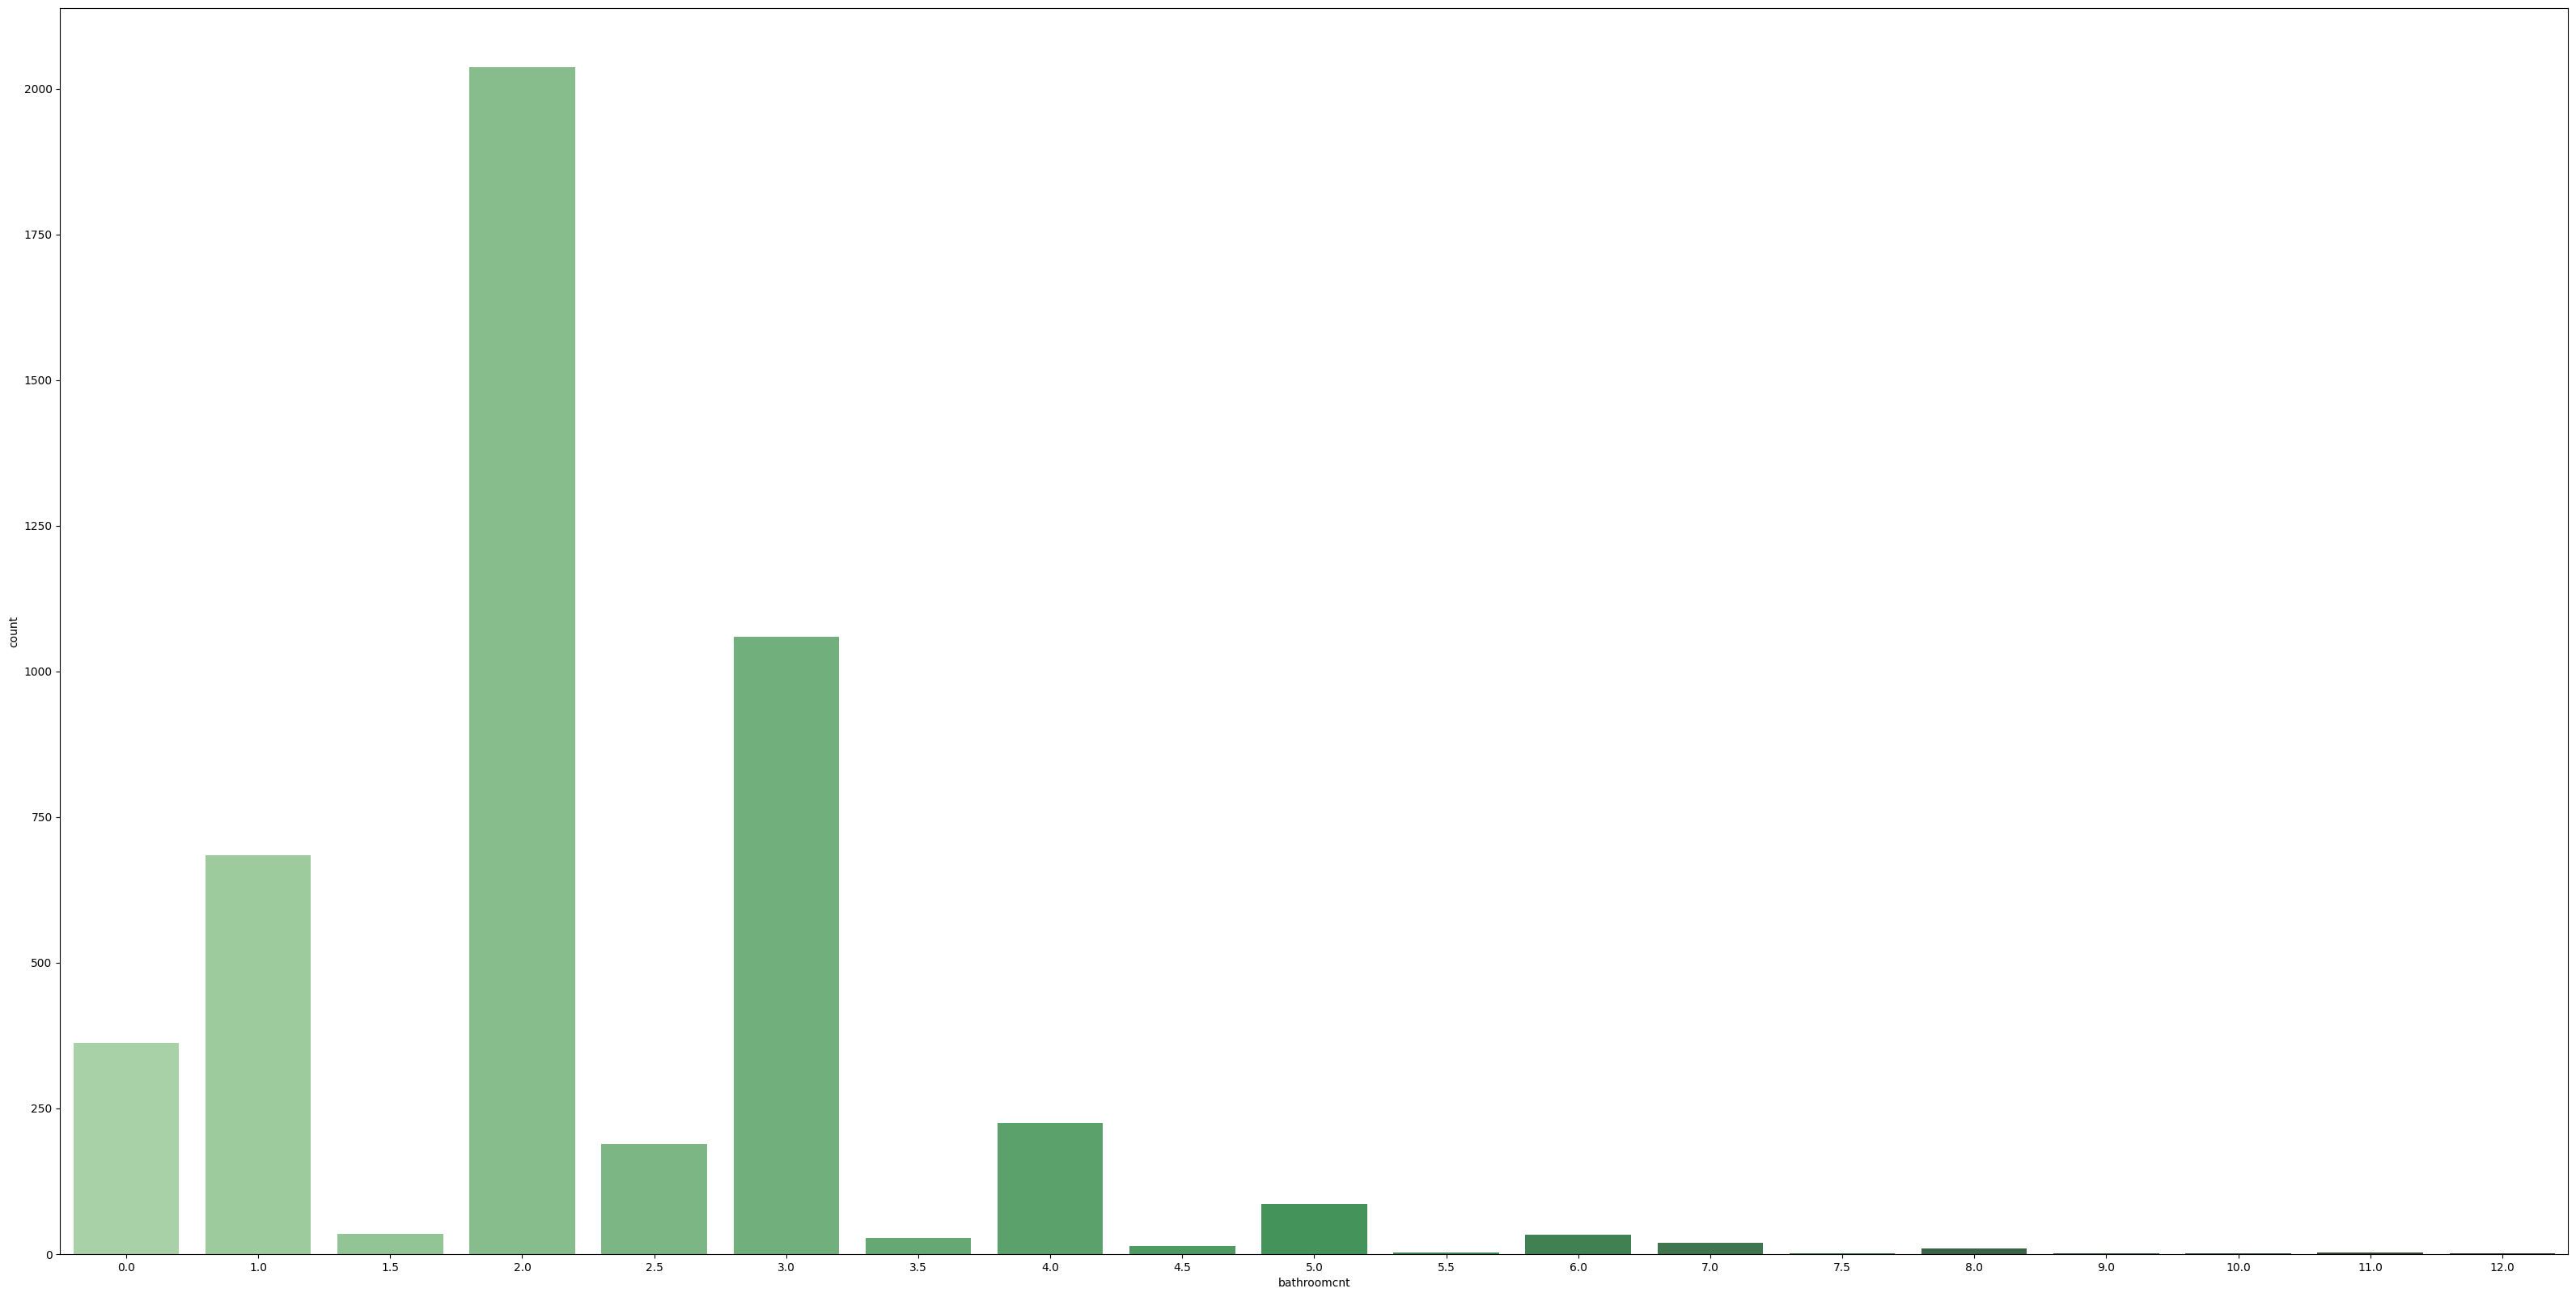

In [10]:
plt.figure(figsize=(40,20))
sns.countplot(x="bathroomcnt", data=project, palette="Greens_d")

In [17]:
totodrop = ['propertycountylandusecode'
          ]

#project.drop(totodrop, inplace = True, axis = 1)
project.head()



,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,10754147,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,34144442.0,-118654084.0,...,3101.0,96337.0,0.0,NaN,NaN,9.0,2016.0,9.0,NaN,NaN
1,10759547,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,34140430.0,-118625364.0,...,3101.0,96337.0,0.0,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN
2,10843547,0.0,0.0,NaN,73026.0,NaN,6037.0,NaN,33989359.0,-118394633.0,...,3101.0,96095.0,0.0,1959.0,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN
3,10859147,0.0,0.0,NaN,5068.0,NaN,6037.0,NaN,34148863.0,-118437206.0,...,3101.0,96424.0,0.0,1948.0,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN
4,10879947,0.0,0.0,NaN,1776.0,NaN,6037.0,NaN,34194168.0,-118385816.0,...,3101.0,96450.0,0.0,1947.0,196751.0,440101.0,2016.0,243350.0,5725.17,NaN


In [20]:
project2 = project.fillna(project.mean())
train = pd.read_csv("train_2017.csv", parse_dates=["transactiondate"])
train.isnull().sum()

parcelid           0
logerror           0
transactiondate    0
dtype: int64

We planned to merge 2 datasets mainly because aim of the competition was to improve the log error and for improving the log error we needed to have some parameters from the properties 2017 dataset also which would help us in predicting future log errors.

In [21]:
train1 = pd.merge(train, project2, on='parcelid', how='left')

<Axes: >

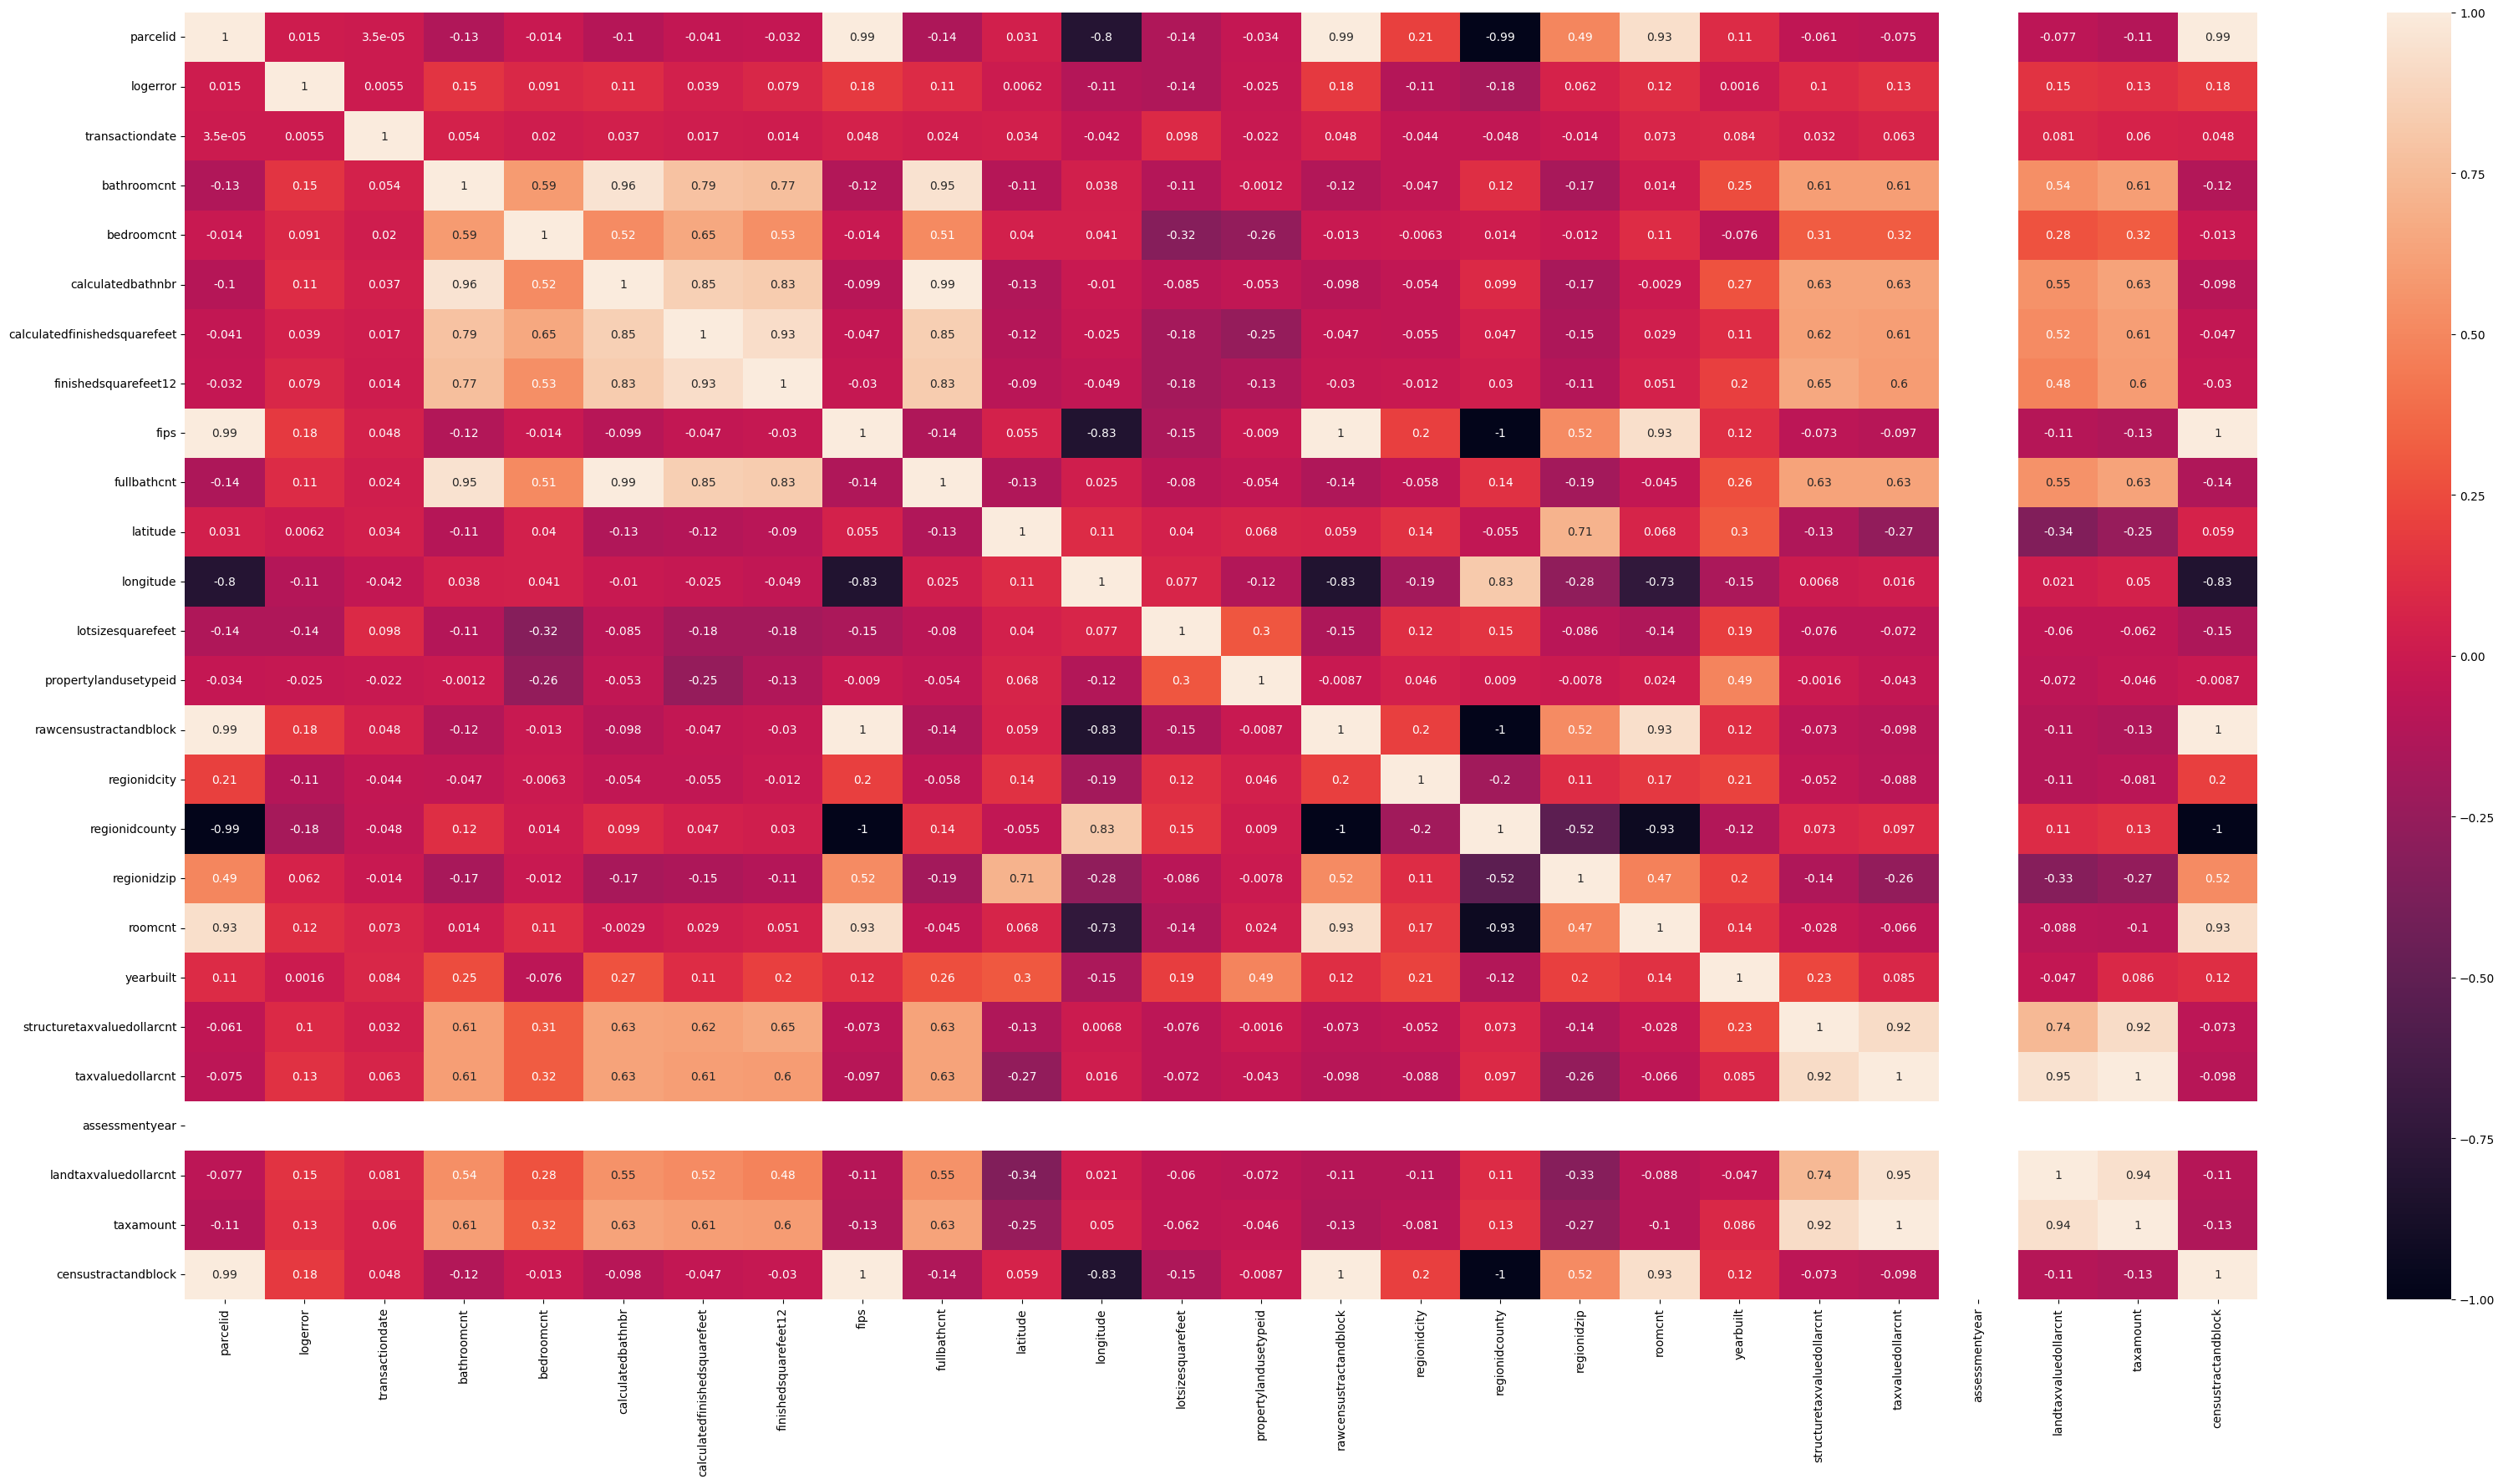

In [22]:
plt.figure(figsize=(40,20))
sns.heatmap(train1.corr(),annot=True)

##Linear Regression

In [23]:
from collections import Counter
import random
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal

In [24]:
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy import stats
from __future__ import print_function


Divided the train and test data taking log error into consideration

In [25]:
X=train1.drop(['parcelid','transactiondate','logerror'],axis=1)
y=train1['logerror']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

In [34]:
from sklearn.linear_model import LinearRegression
logmodel = LinearRegression()

##We are here fitting the model into X_train and y_train

In [37]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

In [43]:
logmodel.fit(X_train,y_train)
print(logmodel.intercept_)

23.62979777104735


In [44]:
logmodel.coef_

array([ 1.03057329e-01,  7.03790513e-03, -6.72035103e-03, -6.64448208e-05,
        2.46724320e-05,  3.50090071e-05, -4.63699570e-02,  1.07958597e-07,
       -8.68699730e-10,  1.80740148e-08, -1.97469456e-03,  4.53192527e-11,
       -8.27392630e-07, -4.92018640e-04, -3.42645727e-05, -3.49948872e-02,
       -5.24660048e-04,  1.05195995e-07,  2.47124840e-07,  0.00000000e+00,
        1.41981664e-07, -2.98460069e-05, -3.52654538e-13])

In [45]:
X_train.columns

Index(['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock'],
      dtype='object')

In [46]:
pd.DataFrame(logmodel.coef_,X.columns,columns=['Coeff'])

,Coeff
bathroomcnt,1.030573e-01
bedroomcnt,7.037905e-03
calculatedbathnbr,-6.720351e-03
calculatedfinishedsquarefeet,-6.644482e-05
finishedsquarefeet12,2.467243e-05
fips,3.500901e-05
fullbathcnt,-4.636996e-02
latitude,1.079586e-07
longitude,-8.686997e-10
lotsizesquarefeet,1.807401e-08


In [49]:
# predictions = logmodel.predict(X_test)
# predictions
# Assuming you have already fitted an imputer on X_train as shown in the previous solution
X_test_imputed = imputer.transform(X_test)

# Now you can make predictions
predictions = logmodel.predict(X_test_imputed)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


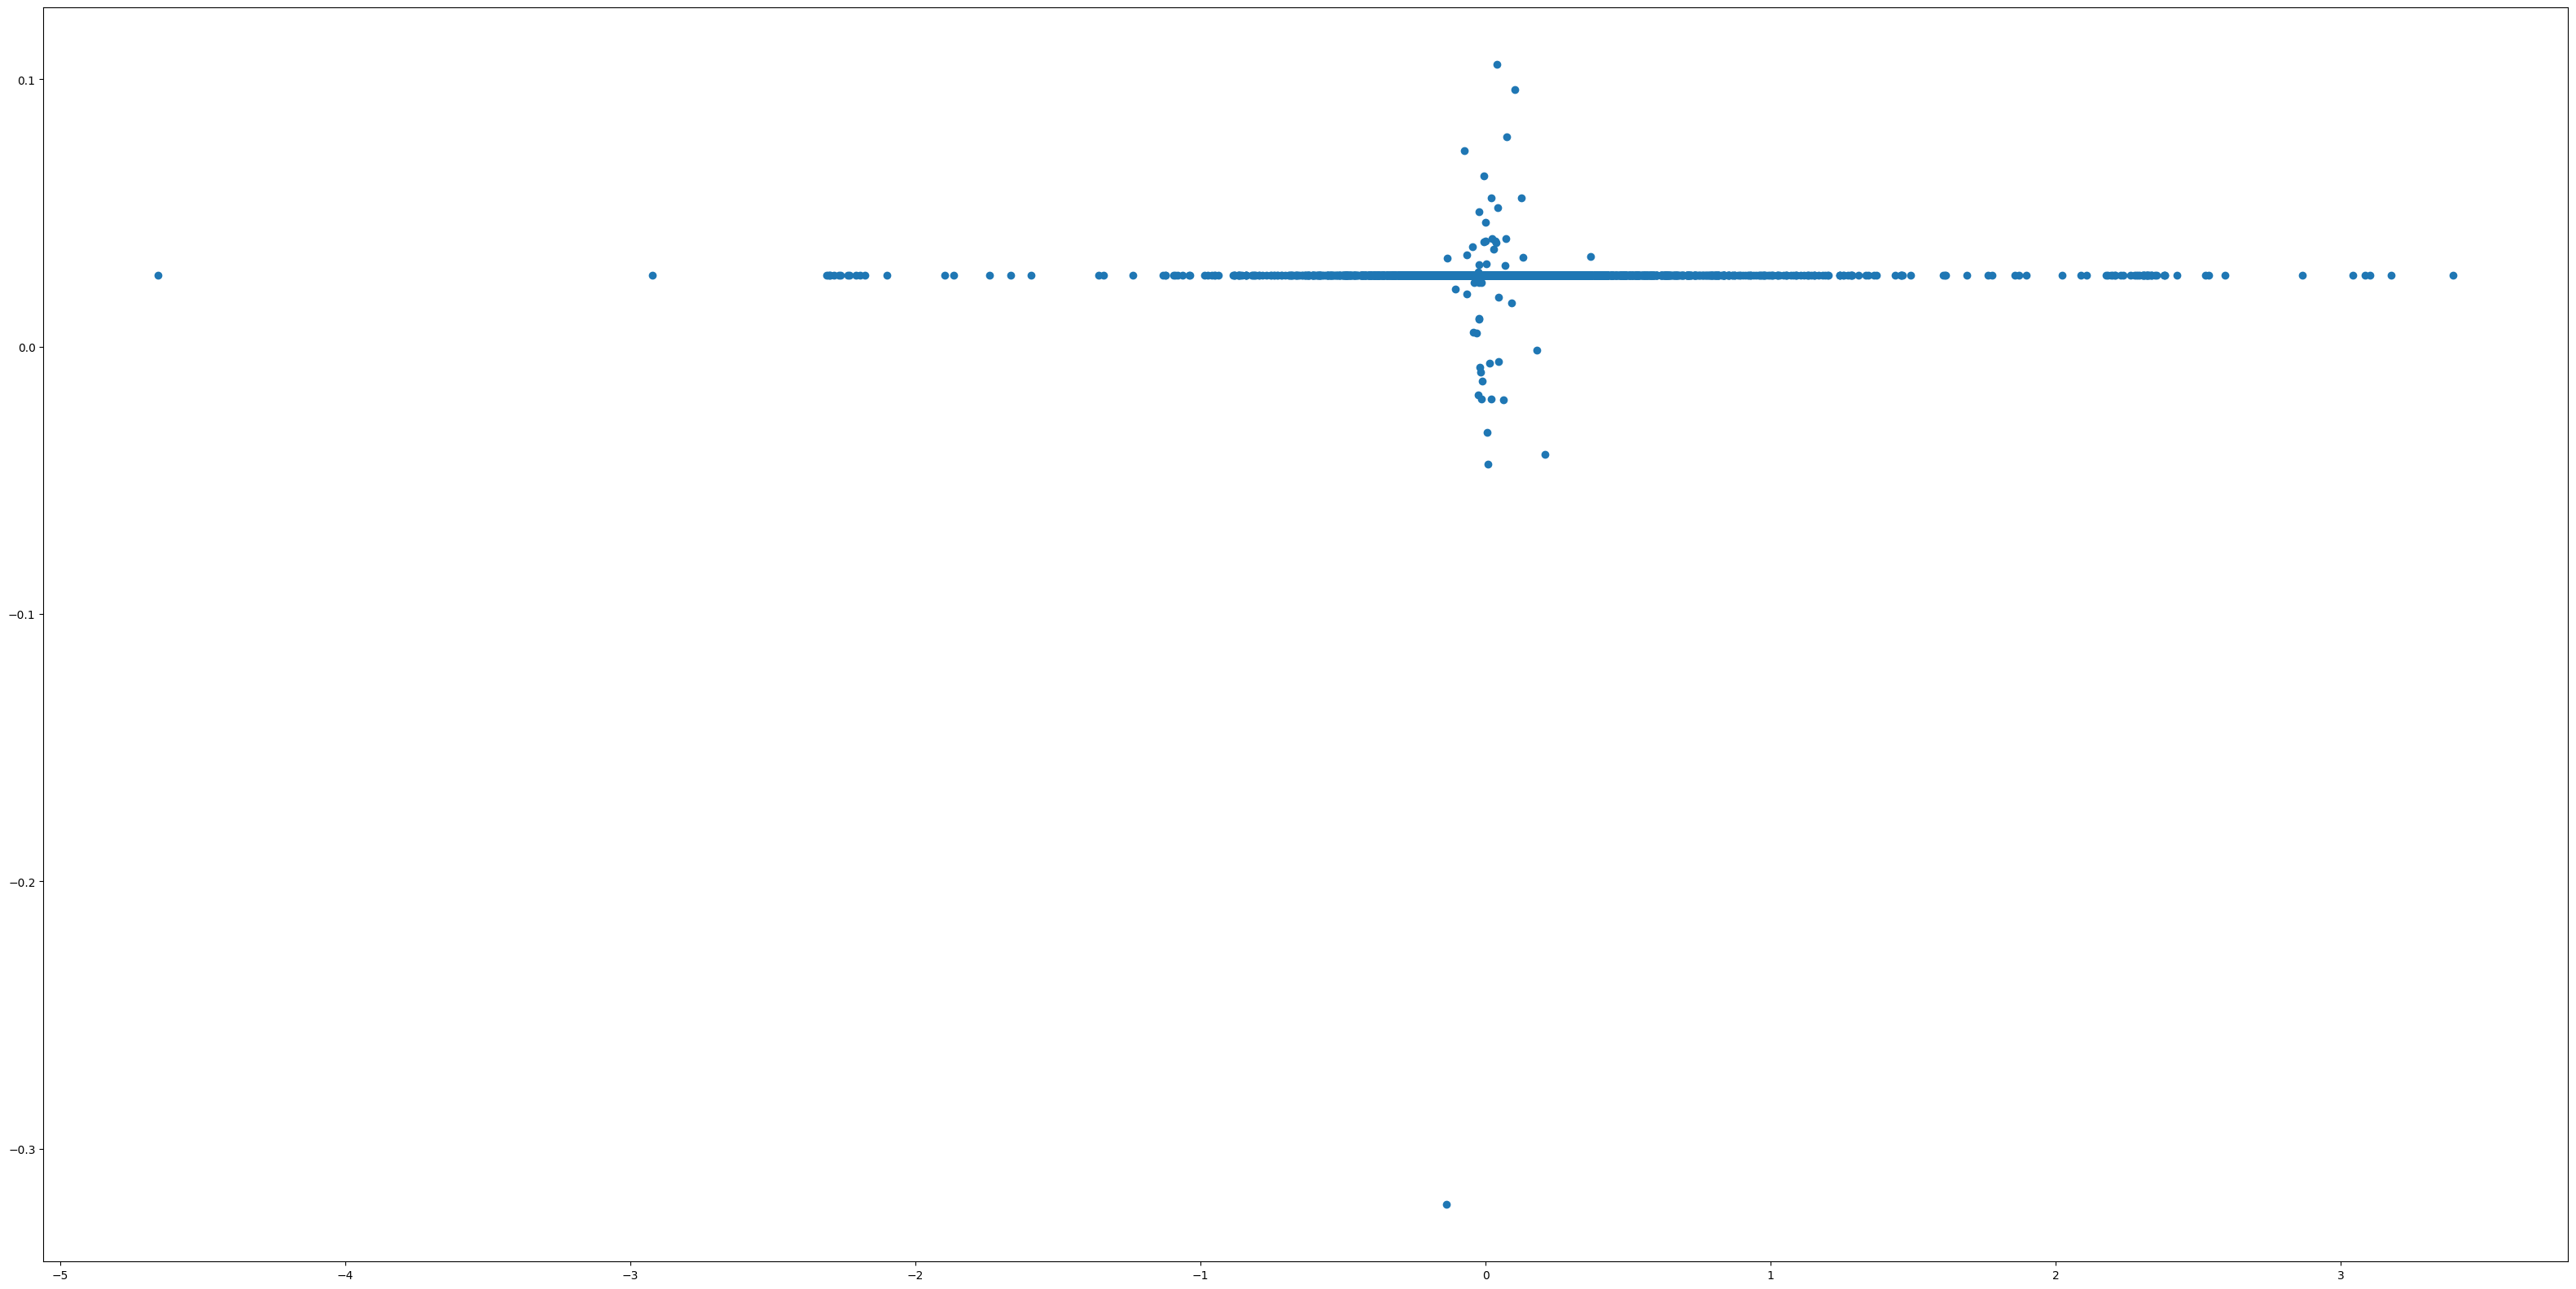

In [50]:
%matplotlib inline
plt.figure(figsize=(40,20))
plt.scatter(y_test,predictions)

In [51]:
dfr = pd.DataFrame({'y_test': y_test,'predictions': predictions})
dfr

,y_test,predictions
77097,0.052601,0.026726
20930,-0.039471,0.026726
11807,0.074354,0.026726
24835,-0.060827,0.026726
71879,-0.068134,0.026726
...,...,...
41244,-0.099770,0.026726
5234,0.060466,0.026726
47399,0.000360,0.026726
64990,0.090621,0.026726


In [52]:
from sklearn import metrics

So as per the above analysis our model has scored 0. So there is no point to further move ahead with this dataset as it makes no sense in the predictions of logerror

In [54]:
# print('Variance score: %.2f' % logmodel.score(X_test, y_test))
# Initialize and fit the imputer on X_train
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Transform X_test using the same imputer
X_test_imputed = imputer.transform(X_test)

# Initialize and train your linear regression model
logmodel = LinearRegression()
logmodel.fit(X_train_imputed, y_train)

# Predict and calculate the variance score
predictions = logmodel.predict(X_test_imputed)
print('Variance score: %.2f' % logmodel.score(X_test_imputed, y_test))

Variance score: -0.00


In [57]:
# Mean Squared Error
print(metrics.mean_squared_error(y_test, predictions))

0.029097450816018642


In [58]:
# Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

0.17057974913810445


What metrics can we used for regression problems?

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

1n∑i=1n|yi−y^i|

Mean Squared Error (MSE) is the mean of the squared errors:

1n∑i=1n(yi−y^i)2

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

1n∑i=1n(yi−y^i)2−−−−−−−−−−−−√

##XGBOOST,LightGBM, OLS

Importing all the importing libraries which will be used for performing analysis using XGBOOST, LightGBM and OLS

In [59]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import gc
from sklearn.linear_model import LinearRegression
import random
import datetime as dt

Parameters

In [60]:
XGB_WEIGHT = 0.6415
BASELINE_WEIGHT = 0.0056
OLS_WEIGHT = 0.0828

XGB1_WEIGHT = 0.8083  # Weight of first in combination of two XGB models

BASELINE_PRED = 0.0115   # Baseline based on mean of training data, per Oleg

Reading data from CSV

In [61]:
print( "\nReading data from disk ...")
prop = pd.read_csv('properties_2017.csv',low_memory = False)
train = pd.read_csv("train_2017.csv")


Reading data from disk ...


##What is Light GBM?
Light GBM is a gradient boosting framework that uses tree based learning algorithm.


##How it differs from other tree based algorithm?
Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm.


Below diagrams explain the implementation of LightGBM and other boosting algorithms

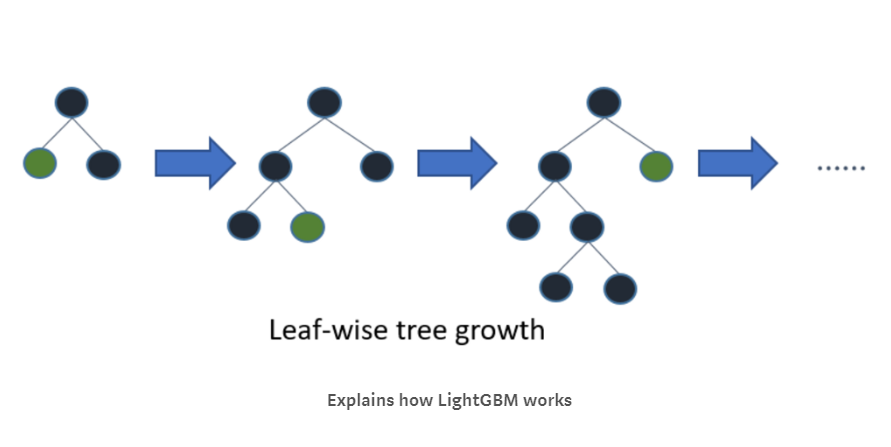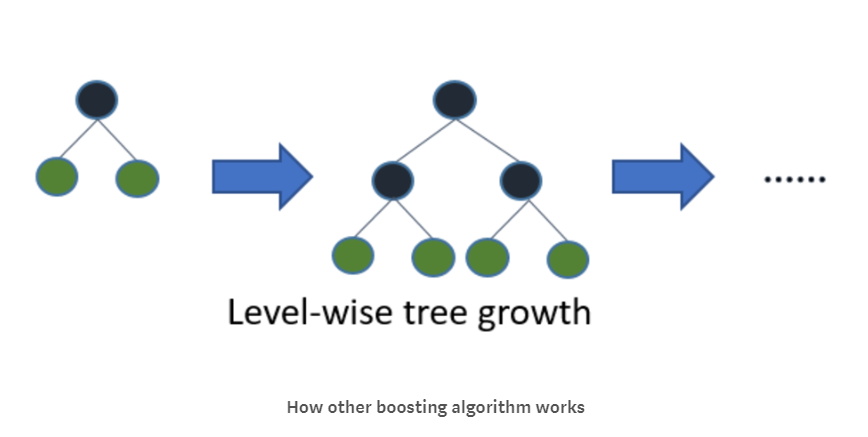

##What are its Advantages?
LightGBM as we already know is a gradient boosting framework that makes the use of tree-based learning algorithms. It is designed with the following advantages in order to be distributed as well as efficient:

Higher efficiency as well as faster training speed

Usage of lower memory

Better accuracy

Supports Parallel and GPU learning

Data of large-scale can be handled

##Can we use Light GBM everywhere?
No, it is not advisable to use LGBM on small datasets. Light GBM is sensitive to overfitting and can easily overfit small data. Their is no threshold on the number of rows but my experience suggests me to use it only for data with 10,000+ rows.

This was one of the main reasons why we planned to use LightGBM on our project data
In the below code I have merged both the properties and train data sets with the help of the join key named ParcelId, filled the null values with the median values and also processed the data for LightGBM and dropped some irrelevant columns

###PROCESS DATA FOR LIGHTGBM

In [64]:
print( "\nProcessing data for LightGBM ..." )
# for c, dtype in zip(prop.columns, prop.dtypes):
#     if dtype == np.float64:
#         prop[c] = prop[c].astype(np.float32)

# df_train = train.merge(prop, how='left', on='parcelid')
# df_train.fillna(df_train.median(),inplace = True)

# x_train = df_train.drop(['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc',
#                          'propertycountylandusecode', 'fireplacecnt', 'fireplaceflag'], axis=1)
# Convert columns to appropriate data types
for c, dtype in zip(prop.columns, prop.dtypes):
    if dtype == np.float64:
        prop[c] = prop[c].astype(np.float32)
    elif dtype == 'object':
        try:
            prop[c] = prop[c].astype(np.float32)
        except ValueError:
            pass

# Handle date columns separately (convert to datetime if needed or drop)
if 'transactiondate' in train.columns:
    train['transactiondate'] = pd.to_datetime(train['transactiondate'])

# Merge datasets
df_train = train.merge(prop, how='left', on='parcelid')

# Fill missing values with median of the column
df_train.fillna(df_train.median(numeric_only=True), inplace=True)

# Drop unwanted columns
x_train = df_train.drop(['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc',
                         'propertycountylandusecode', 'fireplacecnt', 'fireplaceflag'], axis=1)

# Check the resulting DataFrame
print(x_train.head())


Processing data for LightGBM ...
   airconditioningtypeid  architecturalstyletypeid  basementsqft  bathroomcnt  \
0                    1.0                       NaN           NaN          2.0   
1                    1.0                       NaN           NaN          2.0   
2                    1.0                       NaN           NaN          2.0   
3                    1.0                       NaN           NaN          2.0   
4                    1.0                       NaN           NaN          2.0   

   bedroomcnt  buildingclasstypeid  buildingqualitytypeid  calculatedbathnbr  \
0         3.0                  NaN                    7.0                2.0   
1         3.0                  NaN                    7.0                2.0   
2         3.0                  NaN                    7.0                2.0   
3         3.0                  NaN                    7.0                2.0   
4         3.0                  NaN                    7.0                2.0   

Code below gives the shape of an array along x_train and y_train

In [65]:
y_train = df_train['logerror'].values
print(x_train.shape, y_train.shape)


train_columns = x_train.columns

for c in x_train.dtypes[x_train.dtypes == object].index.values:
    x_train[c] = (x_train[c] == True)

del df_train; gc.collect()

x_train = x_train.values.astype(np.float32, copy=False)
d_train = lgb.Dataset(x_train, label=y_train)

(77613, 53) (77613,)


###Initializing Parameters
Description of the parameters of LightGBM :

####RUN LIGHTGBM

In [66]:
params = {}
params['max_bin'] = 10
params['learning_rate'] = 0.0021 # shrinkage_rate
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'l1'          # or 'mae'
params['sub_feature'] = 0.345
params['bagging_fraction'] = 0.85 # sub_row
# Note: To enable bagging, bagging_freq should be set to a non zero value as well
params['bagging_freq'] = 40 #after every 40 iterations bagging will be performed
params['num_leaves'] = 512        # num_leaf
params['min_data'] = 500         # min_data_in_leaf
params['min_hessian'] = 0.05     # min_sum_hessian_in_leaf
params['verbose'] = 0
params['feature_fraction_seed'] = 2
params['bagging_seed'] = 3

In [67]:
print("\nFitting LightGBM model ...")
clf = lgb.train(params, d_train, 430)

del d_train; gc.collect()
del x_train; gc.collect()


Fitting LightGBM model ...
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopp

0

In [69]:
print("\nPrepare for LightGBM prediction ...")
print("   Read sample file ...")
sample = pd.read_csv('sample_submission.csv')
print("   ...")


Prepare for LightGBM prediction ...
   Read sample file ...
   ...


In [70]:
sample['parcelid'] = sample['ParcelId']
print("   Merge with property data ...")
df_test = sample.merge(prop, on='parcelid', how='left')
print("   ...")
del sample, prop; gc.collect()
print("   ...")

   Merge with property data ...
   ...
   ...


In [71]:
x_test = df_test[train_columns]
print("   ...")
del df_test; gc.collect()
print("   Preparing x_test...")
for c in x_test.dtypes[x_test.dtypes == object].index.values:
    x_test[c] = (x_test[c] == True)
print("   ...")
x_test = x_test.values.astype(np.float32, copy=False)
print("Test shape :", x_test.shape)

   ...
   Preparing x_test...
   ...
Test shape : (2945984, 53)


In [72]:
print("\nStart LightGBM prediction ...")
p_test = clf.predict(x_test)

del x_test; gc.collect()

print( "\nUnadjusted LightGBM predictions:" )
print( pd.DataFrame(p_test).head() )


Start LightGBM prediction ...

Unadjusted LightGBM predictions:
          0
0  0.016755
1  0.016755
2  0.016755
3  0.016755
4  0.016755


##XGBoost
XGBoost is an open-source software library which provides the gradient boosting framework for C++, Java, Python, R, and Julia. It works on Linux, Windows, and macOS.

XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data.

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

RE-READ PROPERTIES FILE

In [73]:
print( "\nRe-reading properties file ...")
properties = pd.read_csv('properties_2017.csv')


Re-reading properties file ...


PROCESS DATA FOR XGBOOST

LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels


fit(y) : To Fit label encoder


inverse_transform(y) : To Transform labels back to original encoding

In [74]:
print( "\nProcessing data for XGBoost ...")
for c in properties.columns:
    properties[c]=properties[c].fillna(-1)
    if properties[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(properties[c].values))
        properties[c] = lbl.transform(list(properties[c].values))

train_df = train.merge(properties, how='left', on='parcelid')
x_train = train_df.drop(['parcelid', 'logerror','transactiondate'], axis=1)
x_test = properties.drop(['parcelid'], axis=1)
# shape
print('Shape train: {}\nShape test: {}'.format(x_train.shape, x_test.shape))


Processing data for XGBoost ...
Shape train: (77613, 57)
Shape test: (4787, 57)


##Dropping out ouliers

In [75]:
train_df=train_df[ train_df.logerror > -0.4 ]
train_df=train_df[ train_df.logerror < 0.419 ]
x_train=train_df.drop(['parcelid', 'logerror','transactiondate'], axis=1)
y_train = train_df["logerror"].values.astype(np.float32)
y_mean = np.mean(y_train)

print('After removing outliers:')
print('Shape train: {}\nShape test: {}'.format(x_train.shape, x_test.shape))

After removing outliers:
Shape train: (75949, 57)
Shape test: (4787, 57)


RUN XGBOOST

In [76]:
print("\nSetting up data for XGBoost ...")
# xgboost params
xgb_params = {
    'eta': 0.037,
    'max_depth': 5,
    'subsample': 0.80,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'lambda': 0.8,
    'alpha': 0.4,
    'base_score': y_mean,
    'silent': 1
}

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test)

num_boost_rounds = 250
print("num_boost_rounds="+str(num_boost_rounds))


Setting up data for XGBoost ...
num_boost_rounds=250


In [77]:
# train model
print( "\nTraining XGBoost ...")
model = xgb.train(dict(xgb_params, silent=1), dtrain, num_boost_round=num_boost_rounds)

print( "\nPredicting with XGBoost ...")
xgb_pred1 = model.predict(dtest)

print( "\nFirst XGBoost predictions:" )
print( pd.DataFrame(xgb_pred1).head() )


Training XGBoost ...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:16:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:16:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)



Predicting with XGBoost ...

First XGBoost predictions:
          0
0  0.036468
1  0.015924
2  0.016261
3  0.028512
4  0.004719


RUN XGBOOST AGAIN

In [78]:
print("\nSetting up data for XGBoost ...")
# xgboost params
xgb_params = {
    'eta': 0.033,
    'max_depth': 6,
    'subsample': 0.80,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'base_score': y_mean,
    'silent': 1
}

num_boost_rounds = 150
print("num_boost_rounds="+str(num_boost_rounds))


Setting up data for XGBoost ...
num_boost_rounds=150


In [79]:
print( "\nTraining XGBoost again ...")
model = xgb.train(dict(xgb_params, silent=1), dtrain, num_boost_round=num_boost_rounds)

print( "\nPredicting with XGBoost again ...")
xgb_pred2 = model.predict(dtest)

print( "\nSecond XGBoost predictions:" )
print( pd.DataFrame(xgb_pred2).head() )


Training XGBoost again ...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:17:53] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:17:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)



Predicting with XGBoost again ...

Second XGBoost predictions:
          0
0  0.079554
1  0.044192
2  0.011196
3  0.021010
4 -0.013396


COMBINE XGBOOST RESULTS

In [80]:
xgb_pred = XGB1_WEIGHT*xgb_pred1 + (1-XGB1_WEIGHT)*xgb_pred2
#xgb_pred = xgb_pred1

print( "\nCombined XGBoost predictions:" )
print( pd.DataFrame(xgb_pred).head() )

del train_df
del x_train
del x_test
del properties
del dtest
del dtrain
del xgb_pred1
del xgb_pred2
gc.collect()


Combined XGBoost predictions:
          0
0  0.044727
1  0.021343
2  0.015290
3  0.027074
4  0.001247


46

##OLS

In [81]:
np.random.seed(17)
random.seed(17)

train = pd.read_csv("train_2017.csv", parse_dates=["transactiondate"])
properties = pd.read_csv("properties_2017.csv")
submission = pd.read_csv("sample_submission.csv")
print(len(train),len(properties),len(submission))

def get_features(df):
    df["transactiondate"] = pd.to_datetime(df["transactiondate"])
    df["transactiondate_year"] = df["transactiondate"].dt.year
    df["transactiondate_month"] = df["transactiondate"].dt.month
    df['transactiondate'] = df['transactiondate'].dt.quarter
    df = df.fillna(-1.0)
    return df

def MAE(y, ypred):
    #logerror=log(Zestimate)−log(SalePrice)
    return np.sum([abs(y[i]-ypred[i]) for i in range(len(y))]) / len(y)

train = pd.merge(train, properties, how='left', on='parcelid')
y = train['logerror'].values
test = pd.merge(submission, properties, how='left', left_on='ParcelId', right_on='parcelid')
properties = [] #memory

exc = [train.columns[c] for c in range(len(train.columns)) if train.dtypes[c] == 'O'] + ['logerror','parcelid']
col = [c for c in train.columns if c not in exc]

train = get_features(train[col])
test['transactiondate'] = '2017-01-01' #should use the most common training date
test = get_features(test[col])

reg = LinearRegression(n_jobs=-1)
reg.fit(train, y); print('fit...')
print(MAE(y, reg.predict(train)))
train = [];  y = [] #memory

test_dates = ['2016-10-01','2016-11-01','2016-12-01','2017-10-01','2017-11-01','2017-12-01']
test_columns = ['201610','201611','201612','201710','201811','201812']

77613 4787 2985217


<ipython-input-81-1c5ef36fed3c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transactiondate"] = pd.to_datetime(df["transactiondate"])
<ipython-input-81-1c5ef36fed3c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transactiondate_year"] = df["transactiondate"].dt.year
<ipython-input-81-1c5ef36fed3c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

fit...
0.0706662412381704


##Combine and Save
COMBINE PREDICTIONS

In [100]:
# Combining XGBoost and LightGBM predictions
XGB_WEIGHT = 0.6415
BASELINE_WEIGHT = 0.0056
OLS_WEIGHT = 0.0828
XGB1_WEIGHT = 0.8083  # Weight of first in combination of two XGB models

# Ensure xgb_pred1 and xgb_pred2 are defined
if 'xgb_pred1' not in locals() or 'xgb_pred2' not in locals():
    print("xgb_pred1 or xgb_pred2 not defined. Make sure you have trained and predicted using XGBoost models.")
else:
    xgb_pred = XGB1_WEIGHT * xgb_pred1 + (1 - XGB1_WEIGHT) * xgb_pred2

    # Ensure both xgb_pred and p_test have the same shape
    if len(xgb_pred) != len(p_test):
        # Resize p_test to match the shape of xgb_pred
        p_test = p_test[:len(xgb_pred)]

    print("\nCombined XGBoost predictions:")
    print(pd.DataFrame(xgb_pred).head())

    # Combining XGBoost, LightGBM, and baseline predictions
    print("\nCombining XGBoost, LightGBM, and baseline predictions ...")
    lgb_weight = (1 - XGB_WEIGHT - BASELINE_WEIGHT) / (1 - OLS_WEIGHT)
    xgb_weight0 = XGB_WEIGHT / (1 - OLS_WEIGHT)
    baseline_weight0 = BASELINE_WEIGHT / (1 - OLS_WEIGHT)
    pred0 = xgb_weight0 * xgb_pred + baseline_weight0 * BASELINE_PRED + lgb_weight * p_test

    print("\nCombined XGB/LGB/baseline predictions:")
    print(pd.DataFrame(pred0).head())

    # Predicting with OLS and combining with XGB/LGB/baseline predictions
    print("\nPredicting with OLS and combining with XGB/LGB/baseline predictions: ...")
    for i in range(len(test_dates)):
        test['transactiondate'] = test_dates[i]
        pred = OLS_WEIGHT * reg.predict(get_features(test)) + (1 - OLS_WEIGHT) * pred0
        submission[test_columns[i]] = [float(format(x, '.4f')) for x in pred]
        print('predict...', i)

    print("\nCombined XGB/LGB/baseline/OLS predictions:")
    print(submission.head())

    # Writing results to disk
    from datetime import datetime
    print("\nWriting results to disk ...")
    submission.to_csv('sub{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')), index=False)
    print("\nFinished ...")


xgb_pred1 or xgb_pred2 not defined. Make sure you have trained and predicted using XGBoost models.


In [109]:
# print( "\nCombining XGBoost, LightGBM, and baseline predicitons ..." )
# lgb_weight = (1 - XGB_WEIGHT - BASELINE_WEIGHT) / (1 - OLS_WEIGHT)
# xgb_weight0 = XGB_WEIGHT / (1 - OLS_WEIGHT)
# baseline_weight0 =  BASELINE_WEIGHT / (1 - OLS_WEIGHT)
#pred0 = xgb_weight0*xgb_pred + baseline_weight0*BASELINE_PRED + lgb_weight*p_test

In [106]:
#print( "\nCombined XGB/LGB/baseline predictions:" )
#print( pd.DataFrame(pred0).head() )

In [107]:
# print( "\nPredicting with OLS and combining with XGB/LGB/baseline predicitons: ..." )
# for i in range(len(test_dates)):
#     test['transactiondate'] = test_dates[i]
#     pred = OLS_WEIGHT*reg.predict(get_features(test)) + (1-OLS_WEIGHT)*pred0
#     submission[test_columns[i]] = [float(format(x, '.4f')) for x in pred]
#     print('predict...', i)

In [110]:
# print( "\nCombined XGB/LGB/baseline/OLS predictions:" )
# print( submission.head() )

WRITE THE RESULTS

In [104]:
from datetime import datetime
print( "\nWriting results to disk ..." )
submission.to_csv('sub{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')), index=False)
print( "\nFinished ...")


Writing results to disk ...

Finished ...


##Summary :
In this notebook we have performed Linear Regression and XGBoost and LightGBM in order to predict the future log error . In Linear we have received a very low variance score(= 0) which made us think that Linear Regression model does not fit out dataset and we need to think about implementing some other methods for predicting and increasing the accuracy of the log error in the future. So, we decided to use LightGBM and XGBoost in order to predict the log error values in Q4 of 2017.